<a href="https://colab.research.google.com/github/Auduj01/joe/blob/main/MNISTJOE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [4]:
# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
  # Normalize pixel values to [0, 1]



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [12]:
model = Sequential([Flatten(input_shape=(28,28)),
                   Dense(128,activation='relu'),
                   Dropout(0.3),
                    Dense(64, activation='relu'),
                    Dropout(0.3),
                    Dense(10,activation='softmax')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2,batch_size=32,verbose=1)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7724 - loss: 0.7181 - val_accuracy: 0.9531 - val_loss: 0.1592
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9321 - loss: 0.2297 - val_accuracy: 0.9652 - val_loss: 0.1193
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9481 - loss: 0.1776 - val_accuracy: 0.9688 - val_loss: 0.1079
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9574 - loss: 0.1445 - val_accuracy: 0.9707 - val_loss: 0.1028
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9604 - loss: 0.1329 - val_accuracy: 0.9728 - val_loss: 0.0965
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9648 - loss: 0.1139 - val_accuracy: 0.9745 - val_loss: 0.0883
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9678 - loss: 0.1054 - val_accuracy: 0.9763 - val_loss: 0.0908
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9697 - loss: 0.0976

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 1s - 2ms/step - accuracy: 0.9750 - loss: 0.0825

Test accuracy: 0.9750000238418579


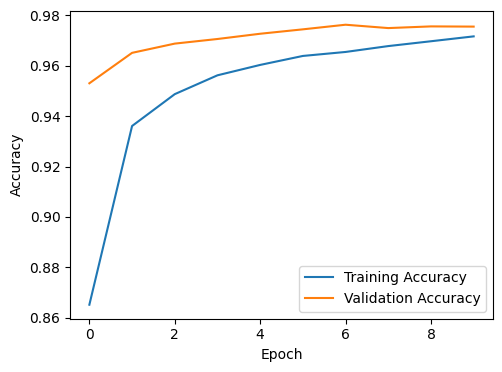

In [16]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

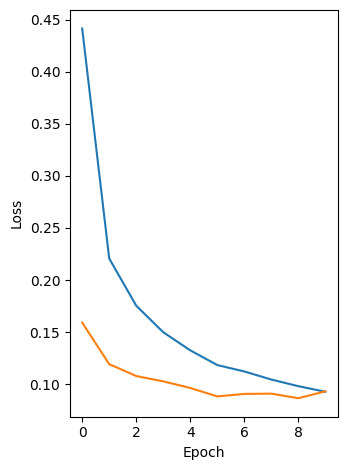

In [17]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend
plt.tight_layout()
plt.show()